In [1]:
import tensorflow as tf
import numpy as np
import tensorflow_datasets as tfds

## Import the `aiproteomics` python package

In [2]:
import aiproteomics

## Load a ready-to-use dataset derived from the DeepDIA model

It's now possible to load (remote) proteomics datasets defined in the package, with all preprocessing carried out automatically.

In [6]:
ds, ds_info = tfds.load('aiproteomicshela1', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

TypeError: Cannot interpret 'tf.int32' as a data type

Let's look at the info for the 'hela1' dataset we have just fetched:

In [ ]:
print(ds_info)

## Build a transformer model for retention time prediction

The `aiproteomics` package will also contains quick methods for obtaining common retention time models. Currently we can build a transformer for learning retention time.

In [ ]:
model = aiproteomics.rt.models.build_rt_transformer_model(
        num_layers = 6,                 # number of layers, paper = 6
        d_model = 512,
        num_heads = 8,                  # Number of attention heads, paper = 8
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer, paper = 2048
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 50                    # maximal peptide length
    )

In [ ]:
model.summary()

In [ ]:
import tensorflow as tf
tf.keras.utils.plot_model(model, show_shapes=True)

## Train the transformer model on our dataset

In [ ]:
learning_rate = aiproteomics.models.CustomSchedule(512)
optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
model.compile(optimizer=optimizer, loss=tf.keras.losses.MeanAbsoluteError())

In [ ]:
history = model.fit(
    ds['train'],
    batch_size=1024,
    epochs=1,
    validation_data=ds['validate'],
    callbacks = []
)

## Check performance of model against validation data

In [ ]:
score_train = model.evaluate(ds['train'], verbose=0)
score_val = model.evaluate(ds['validate'], verbose=0)
score = model.evaluate(ds['test'], verbose=0)

print(score_train, score_val, "->", score)

## Prosit1 fragmentation model

In [3]:
model = aiproteomics.frag.models.build_prosit1_model()

2022-03-30 17:55:21.264204: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


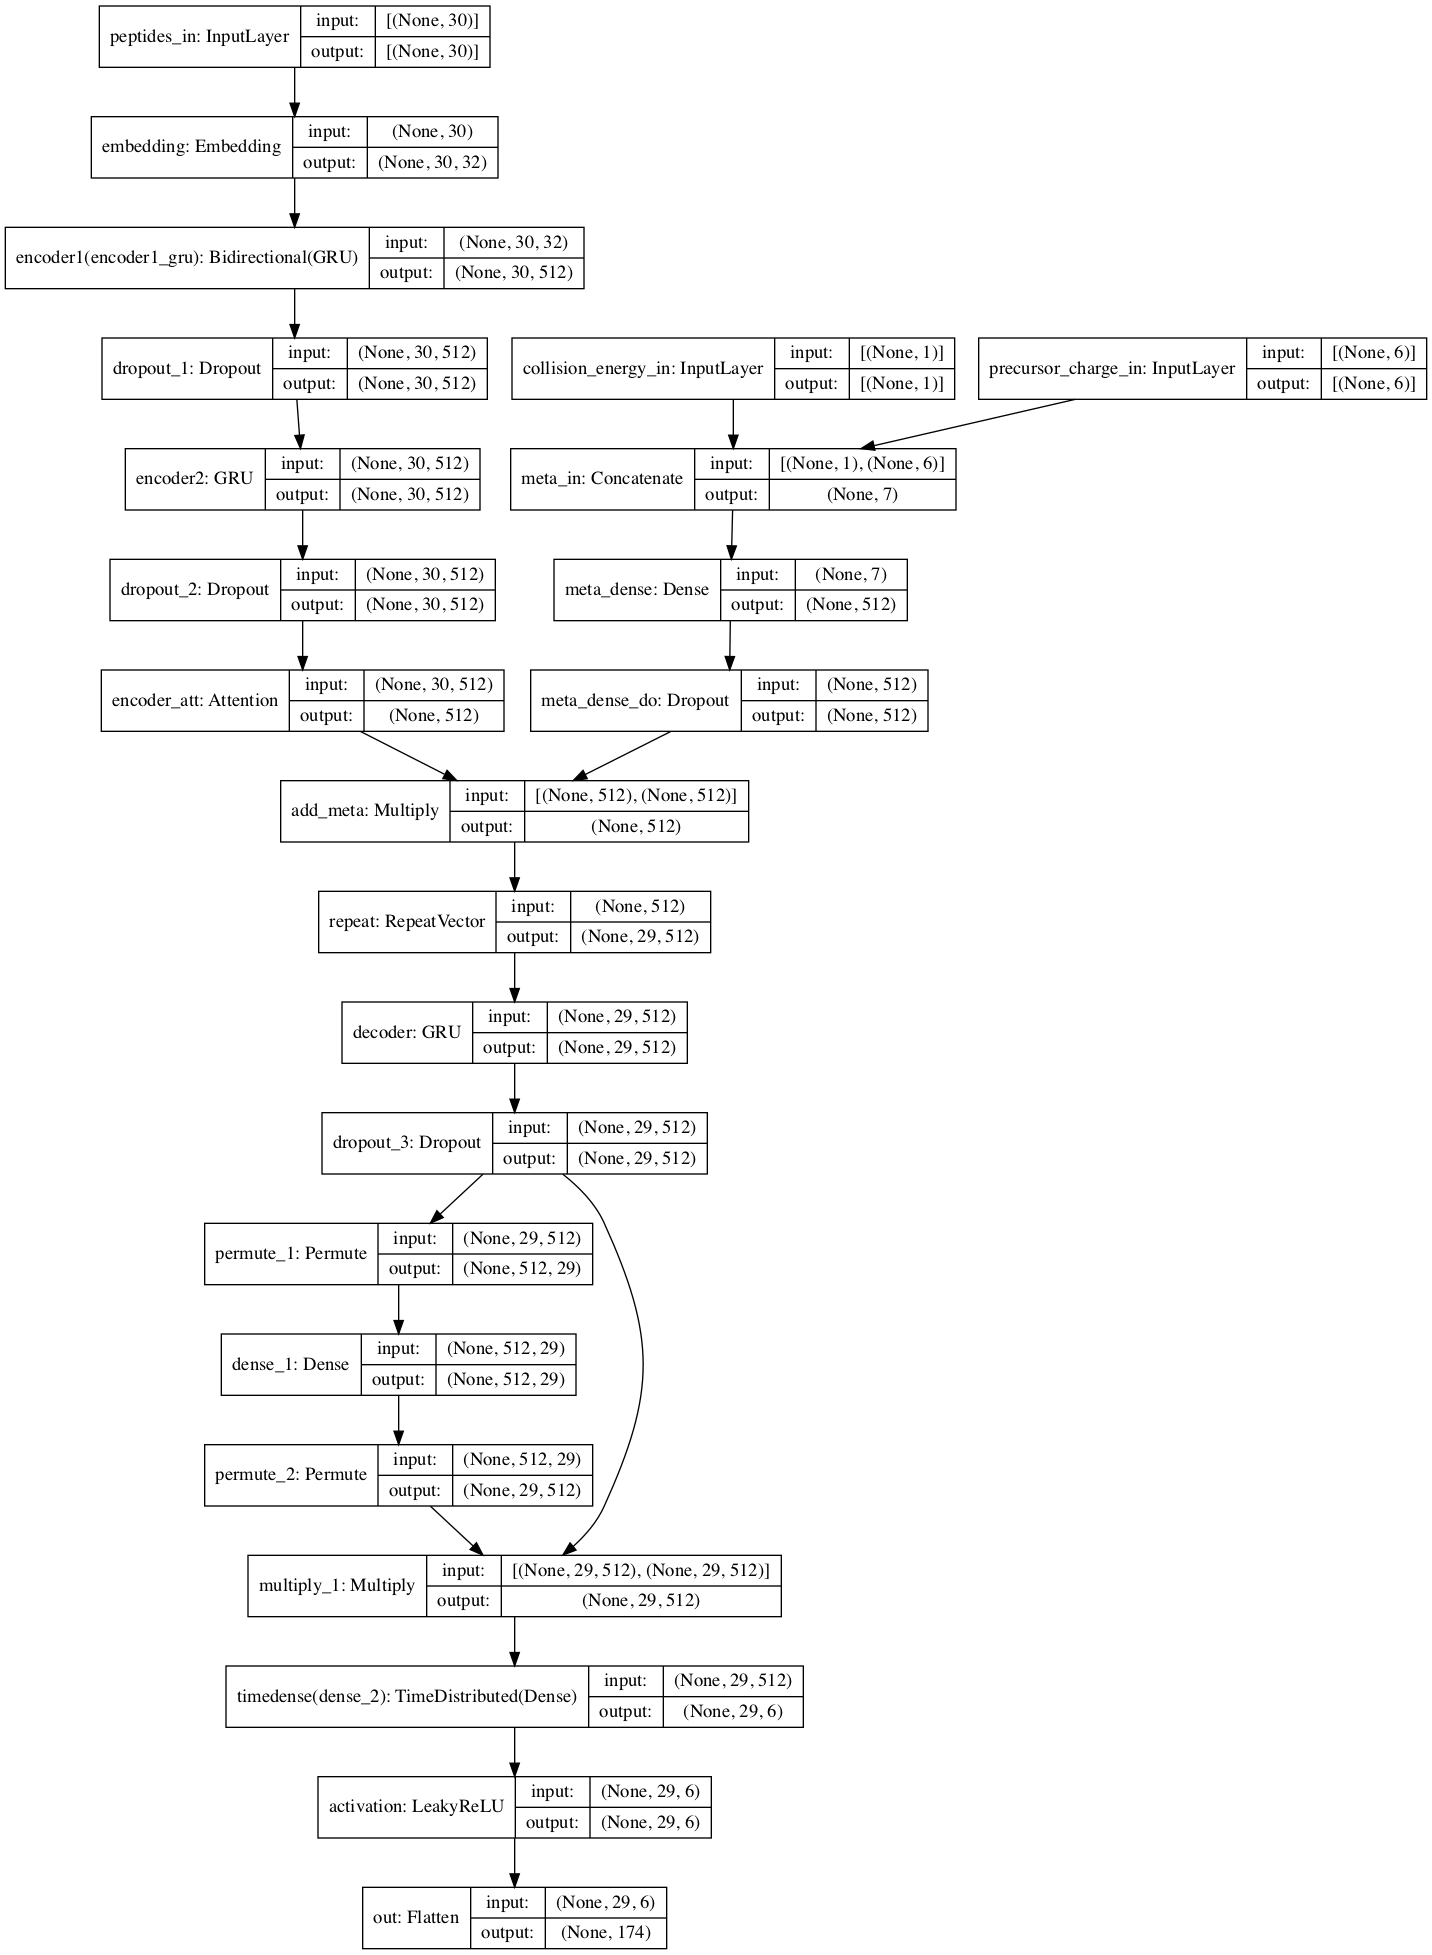

In [4]:
tf.keras.utils.plot_model(model, show_shapes=True)

## Fragmentation model

In [5]:
model = aiproteomics.frag.models.build_frag_transformer_model(
        num_layers = 6,                 # number of layers
        d_model = 512,
        num_heads = 8,                  # Number of attention heads
        d_ff = 2048,                    # Hidden layer size in feed forward network inside transformer
        dropout_rate = 0.1,             #
        vocab_size = 22,                # number of aminoacids
        max_len = 50                    # maximal peptide length
    )

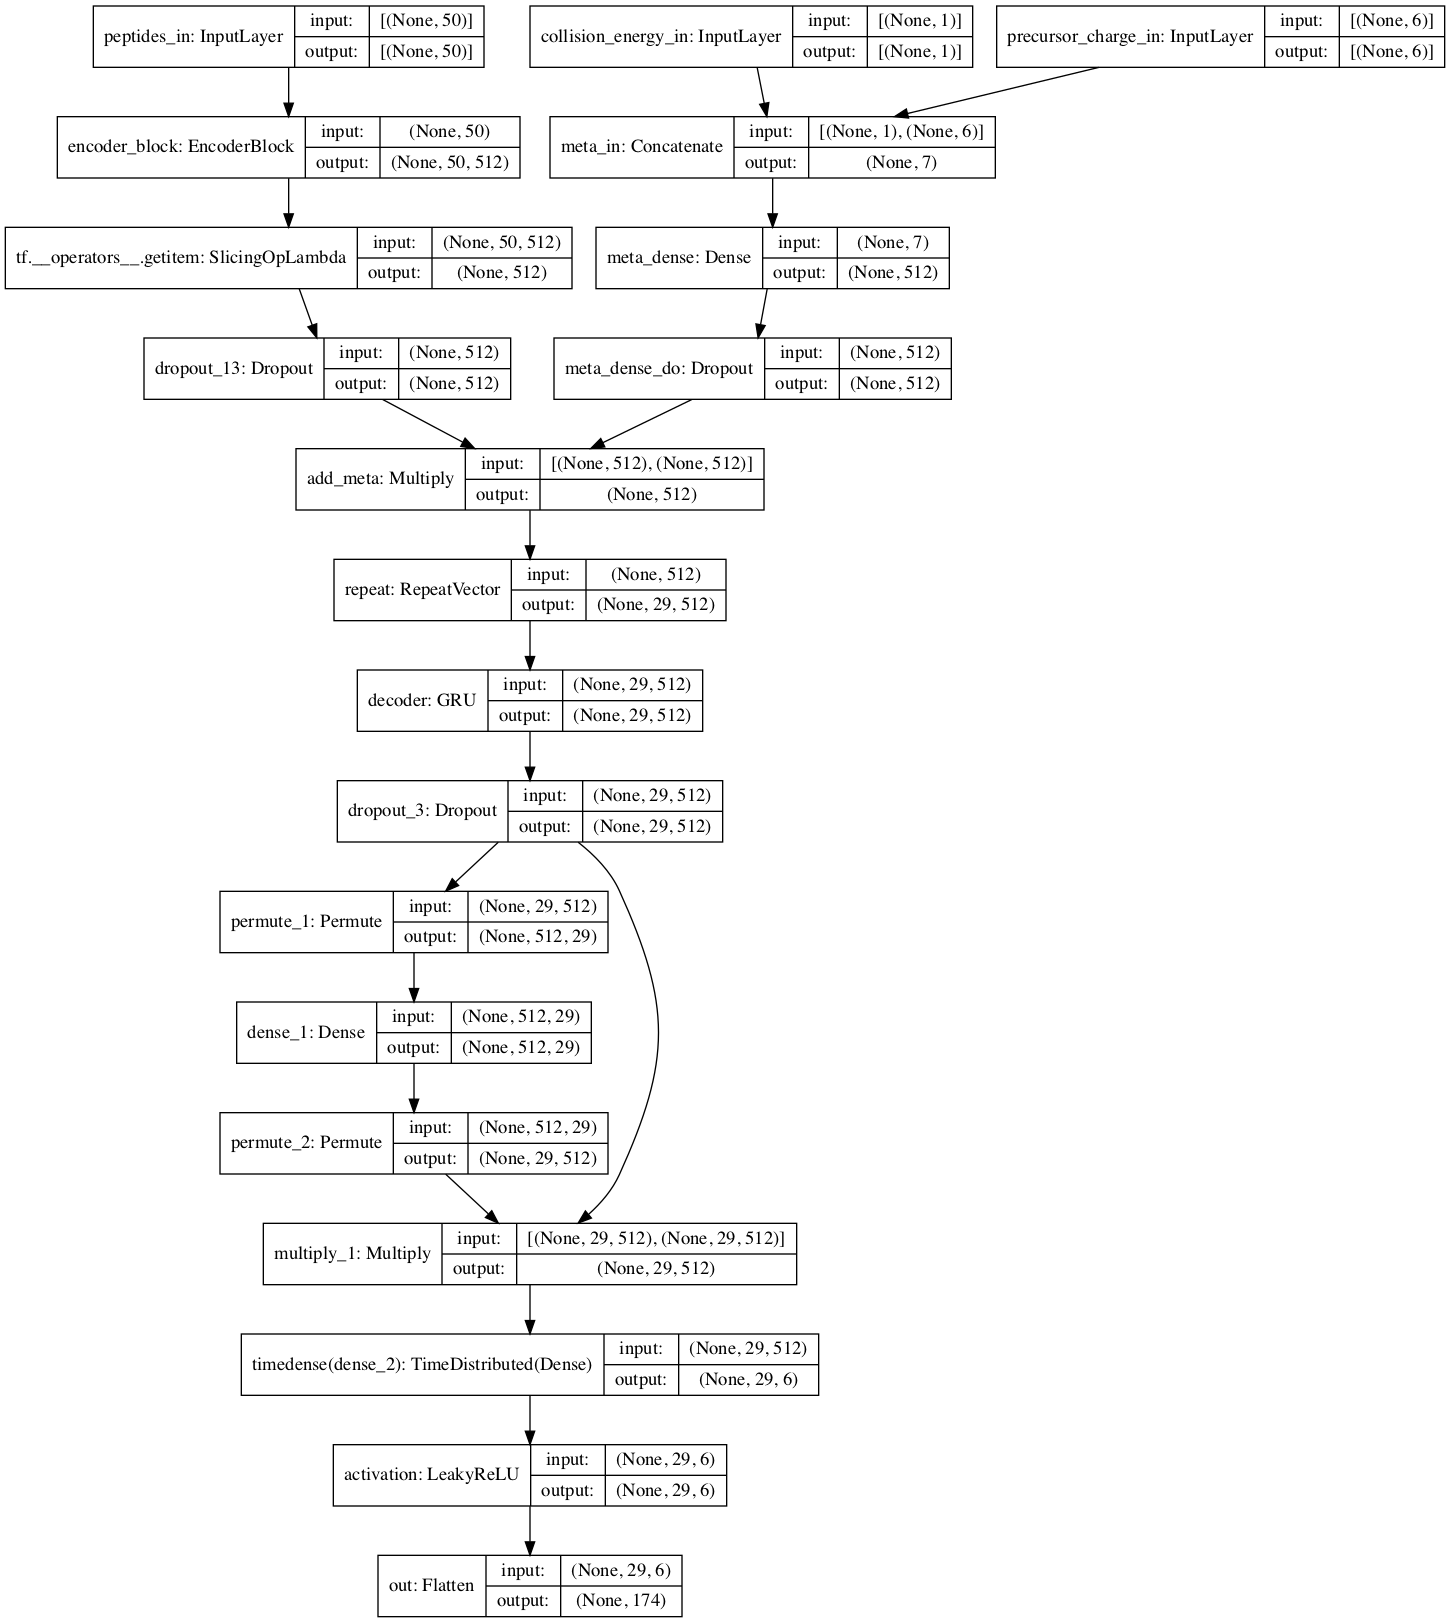

In [6]:
tf.keras.utils.plot_model(model, show_shapes=True)